# Educational Attainment in L.A. Neighborhoods
## What are the highest and lowest educational attainment neighborhoods in L.A. City?

### Import all libraries

In [16]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import contextily as ctx
import folium

### Load educational attainment file with percentage of neighborhoods with a bachelor's degree or higher and GeoJSON file of the L.A. Times neighborhood boundaries 

In [17]:
# Load Excel file
education = pd.read_excel("Bachelor's Degree or Higher - 2022.xlsx")

# Load GeoJSON file
neighborhood = gpd.read_file('LA_Times_Neighborhood_Boundaries.geojson')

### Merge education and neighborhood dataframes on the neighborhoods ('name') column

In [18]:
from functools import reduce

# List of DataFrames
dfs = [education, neighborhood]

# Merge all DataFrames on the 'name' column
df = reduce(lambda left, right: pd.merge(left, right, on='name', how='inner'), dfs)

# See data
df.head()

,name,Bachelor's Degree or Higher,OBJECTID,geometry
0,Pico-Union,15.47%,74,"POLYGON ((-118.28146 34.05250, -118.28094 34.0..."
1,Sylmar,19.97%,90,"POLYGON ((-118.47661 34.33019, -118.47583 34.3..."
2,North Hills,24.54%,66,"POLYGON ((-118.49525 34.22023, -118.49569 34.2..."
3,Harbor Gateway,24.73%,43,"POLYGON ((-118.29851 33.81314, -118.30880 33.8..."
4,Lake Balboa,34.29%,114,"POLYGON ((-118.50116 34.22114, -118.50116 34.2..."


### Drop the 'OBJECTID' column with unnecessary information

In [19]:
# Drop a single column from the DataFrame
df.drop('OBJECTID', axis=1, inplace=True)

# See data
df.head()

,name,Bachelor's Degree or Higher,geometry
0,Pico-Union,15.47%,"POLYGON ((-118.28146 34.05250, -118.28094 34.0..."
1,Sylmar,19.97%,"POLYGON ((-118.47661 34.33019, -118.47583 34.3..."
2,North Hills,24.54%,"POLYGON ((-118.49525 34.22023, -118.49569 34.2..."
3,Harbor Gateway,24.73%,"POLYGON ((-118.29851 33.81314, -118.30880 33.8..."
4,Lake Balboa,34.29%,"POLYGON ((-118.50116 34.22114, -118.50116 34.2..."


### Examine data types and make sure there's no null data in any of the columns

In [20]:
# look at the data types, verbose = True shows us all the counts
df.info(verbose=True, show_counts=True)
# compare non-null to shape of data to ensure no null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   name                         110 non-null    object  
 1   Bachelor's Degree or Higher  110 non-null    object  
 2   geometry                     110 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 2.7+ KB


### Remove percentage sign from the 'Bachelor's Degree or Higher' column for sorting and analysis, convert data type from object to float, and sort the data by the 'Bachelor's Degree of Higher' column from highest to lowest

In [21]:
# Remove the percentage sign and convert to float
df["Bachelor's Degree or Higher"] = df["Bachelor's Degree or Higher"].str.rstrip('%').astype(float)

# Sort by education from highest to lowest
df_sorted = df.sort_values(by="Bachelor's Degree or Higher", ascending=False)

### Examine the top 10 highest educational attainment neighborhoods

In [22]:
# Display the top 10
df_sorted.head(10)

,name,Bachelor's Degree or Higher,geometry
10,Brentwood,80.62,"POLYGON ((-118.49014 34.13096, -118.49009 34.1..."
24,Playa Vista,78.73,"POLYGON ((-118.42548 33.96564, -118.42613 33.9..."
103,Pacific Palisades,77.92,"POLYGON ((-118.55703 34.12653, -118.55669 34.1..."
91,West Los Angeles,77.26,"POLYGON ((-118.43421 34.03741, -118.43516 34.0..."
31,Cheviot Hills,75.41,"POLYGON ((-118.39888 34.04426, -118.39879 34.0..."
101,Westwood,74.83,"POLYGON ((-118.42946 34.07925, -118.42938 34.0..."
104,Bel-Air,72.91,"POLYGON ((-118.46165 34.13077, -118.46077 34.1..."
54,Beverlywood,72.90,"POLYGON ((-118.38609 34.04675, -118.38934 34.0..."
59,Playa del Rey,71.78,"POLYGON ((-118.42735 33.96756, -118.42657 33.9..."
88,Century City,71.18,"POLYGON ((-118.41267 34.06073, -118.41222 34.0..."


### Examine the bottom 10 lowest educational attainment neighborhoods

In [23]:
# Display the bottom 10
df_sorted.tail(10)

,name,Bachelor's Degree or Higher,geometry
35,Wilmington,9.86,"MULTIPOLYGON (((-118.28331 33.75532, -118.2880..."
100,Vermont Knolls,9.82,"POLYGON ((-118.29158 33.96003, -118.29161 33.9..."
77,Harvard Park,9.67,"POLYGON ((-118.30786 33.97457, -118.30898 33.9..."
99,Green Meadows,8.45,"POLYGON ((-118.25411 33.95104, -118.25411 33.9..."
67,Broadway-Manchester,8.34,"POLYGON ((-118.26954 33.92919, -118.26956 33.9..."
45,South Park,7.83,"POLYGON ((-118.28040 33.98916, -118.28061 33.9..."
19,Historic South-Central,7.72,"POLYGON ((-118.26575 34.03147, -118.26361 34.0..."
30,Florence,6.67,"POLYGON ((-118.25645 33.98246, -118.25641 33.9..."
74,Central-Alameda,6.53,"POLYGON ((-118.24605 34.02191, -118.24520 34.0..."
98,Watts,5.98,"POLYGON ((-118.24423 33.95379, -118.24423 33.9..."


### Plot a bar chart of the top 10 neighborhoods with the highest percentage of residents with a bachelor's degree or higher

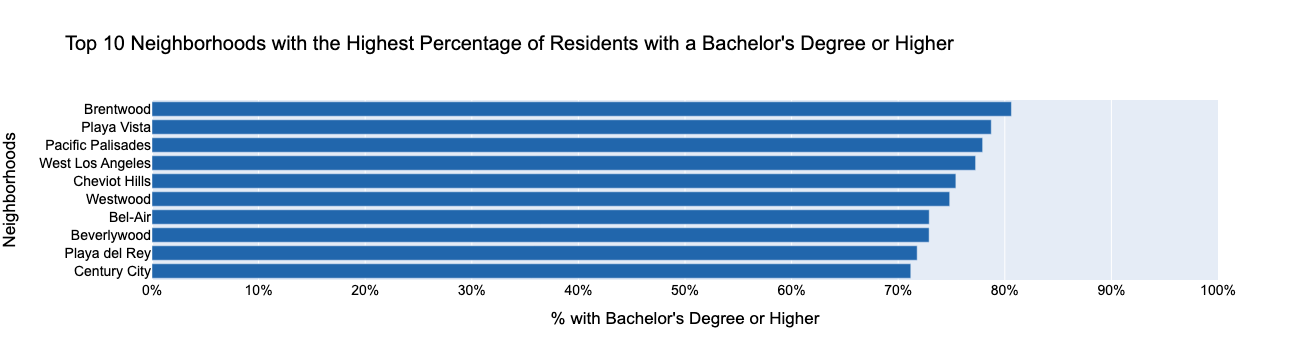

In [24]:
# Get the top 10 neighborhoods and sort them in descending order
top_10_neighborhoods = df_sorted.head(10).sort_values(by="Bachelor's Degree or Higher", ascending=True)

# Create the bar chart using Plotly Express
fig = px.bar(top_10_neighborhoods, x="Bachelor's Degree or Higher", y='name',
             labels={"Bachelor's Degree or Higher": "% with Bachelor's Degree or Higher",
                     "name": "Neighborhood"},
             orientation='h',  # Set orientation to horizontal
             title="Top 10 Neighborhoods with the Highest Percentage of Residents with a Bachelor's Degree or Higher",
             hover_data={"Bachelor's Degree or Higher": True, 'name': False},  # Specify hover data
             color_discrete_sequence=['#2166ac'])  # Set bar color to #2166ac

# Customize the layout
fig.update_layout(xaxis_title="% with Bachelor's Degree or Higher", yaxis_title='Neighborhoods',
                  title_font_size=20,
                  font=dict(family="Arial, sans-serif", size=14, color="Black"),
                  xaxis=dict(range=[0, 100],  # Set the x-axis range from 0 to 100
                             tickvals=list(range(0, 101, 10)),  # Set the tick values in 10% increments
                             ticktext=[f'{i}%' for i in range(0, 101, 10)]))  # Set the tick text in 10% increments

# Show the plot
fig.show()

### Plot a bar chart of the bottom 10 neighborhoods with the lowest percentage of residents with a bachelor's degree or higher

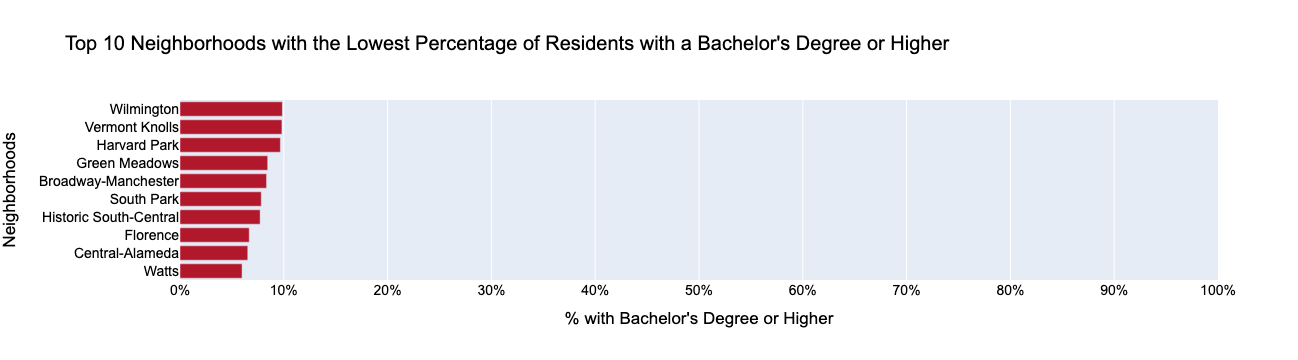

In [25]:
# Get the bottom 10 neighborhoods with the lowest percentage of residents with a bachelor's degree or higher
top_10_lowest_neighborhoods = df_sorted.tail(10).sort_values(by="Bachelor's Degree or Higher", ascending=False)

# Reverse the order of the rows to make the highest percentage bar on top
top_10_lowest_neighborhoods = top_10_lowest_neighborhoods[::-1]

# Create the bar chart using Plotly Express
fig = px.bar(top_10_lowest_neighborhoods, x="Bachelor's Degree or Higher", y='name',
             labels={"Bachelor's Degree or Higher": "% with Bachelor's Degree or Higher",
                     "name": "Neighborhood"},
             orientation='h',  # Set orientation to horizontal
             title="Top 10 Neighborhoods with the Lowest Percentage of Residents with a Bachelor's Degree or Higher",
             hover_data={"Bachelor's Degree or Higher": True, 'name': False},  # Specify hover data
             color_discrete_sequence=['#b2182b'])  # Set bar color to #b2182b

# Customize the layout
fig.update_layout(xaxis_title="% with Bachelor's Degree or Higher", yaxis_title='Neighborhoods',
                  title_font_size=20,
                  font=dict(family="Arial, sans-serif", size=14, color="Black"),
                  xaxis=dict(range=[0, 100],  # Set the x-axis range from 0 to 100
                             tickvals=list(range(0, 101, 10)),  # Set the tick values in 10% increments
                             ticktext=[f'{i}%' for i in range(0, 101, 10)]))  # Set the tick text in 10% increments

# Show the plot
fig.show()

### Convert DataFrame to GeoDataFrame

In [26]:
# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df_sorted, geometry='geometry')

### Reproject GeoDataFrame to web mercator

In [27]:
# reproject to web mercator
gdf = gdf.to_crs(epsg=3857)

### Map the top 10 educational attainment neighborhoods

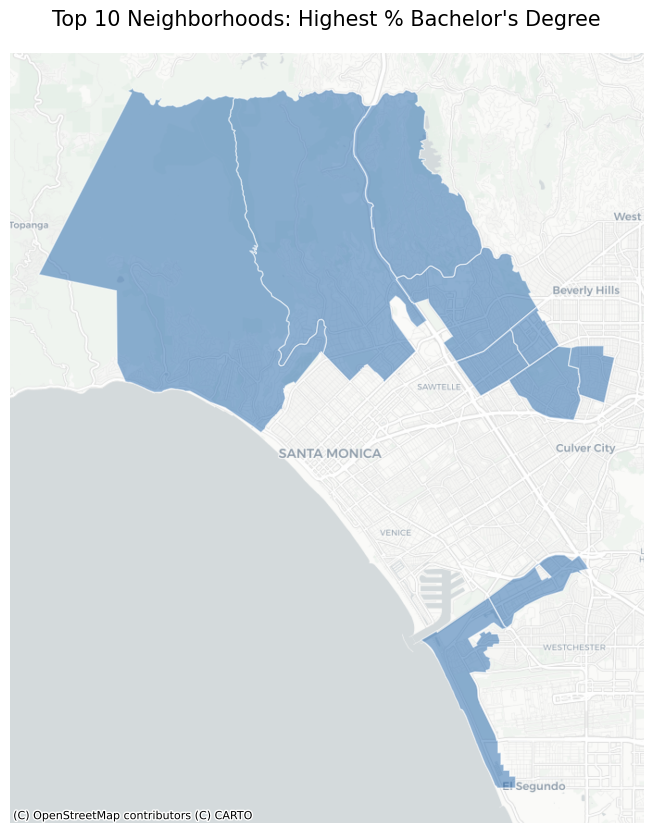

In [29]:
# map the top 10 neighborhoods
fig,ax = plt.subplots(figsize=(12,10))
gdf.sort_values(by="Bachelor's Degree or Higher",ascending=False)[:10].plot(ax=ax,
                                                                 color='#2166ac',
                                                                 edgecolor='white',
                                                                 alpha=0.5)

# title
ax.set_title("Top 10 Neighborhoods: Highest % Bachelor's Degree",fontsize=15,pad=20)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

### Map the bottom 10 educational attainment neighborhoods

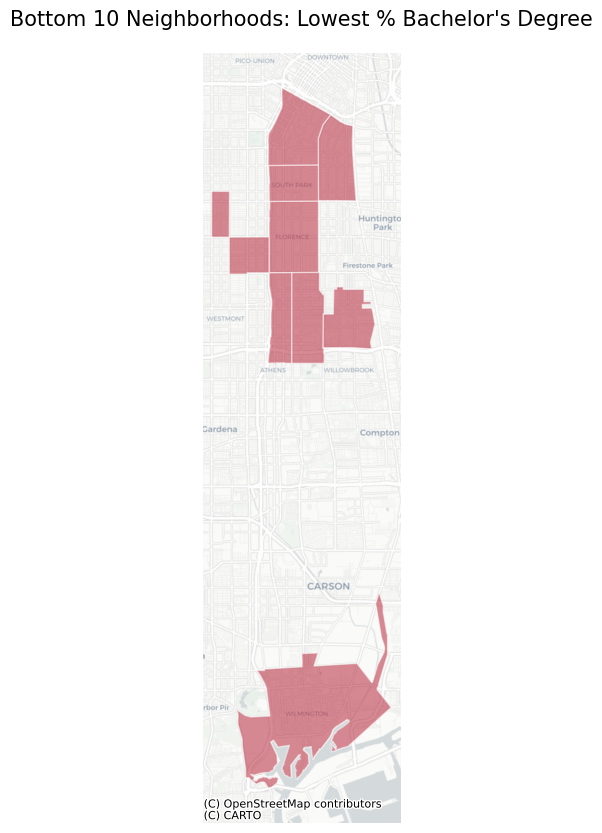

In [30]:
# map the bottom 10 neighborhoods
fig, ax = plt.subplots(figsize=(12,10))
gdf.sort_values(by="Bachelor's Degree or Higher", ascending=True)[:10].plot(ax=ax,
                                                                            color='#b2182b',
                                                                            edgecolor='white',
                                                                            alpha=0.5)

# title
ax.set_title("Bottom 10 Neighborhoods: Lowest % Bachelor's Degree", fontsize=15, pad=20)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

### Plot both top 10 and bottom 10 educational attainment neighborhoods on 1 map of all the neighborhoods in L.A. city

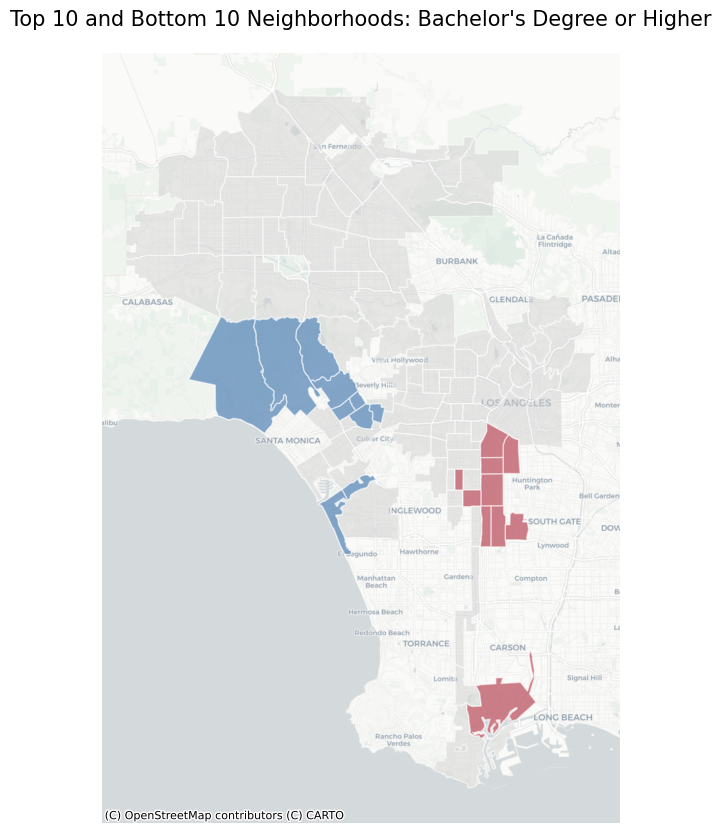

In [31]:
# Plot all neighborhoods on one map
fig, ax = plt.subplots(figsize=(12, 10))

# Plot all neighborhoods in light gray as background
gdf.plot(ax=ax, color='lightgray', edgecolor='white', alpha=0.5)

# Plot top 10 neighborhoods
gdf.sort_values(by="Bachelor's Degree or Higher", ascending=False)[:10].plot(ax=ax,
                                                                               color='#2166ac',
                                                                               edgecolor='white',
                                                                               alpha=0.5)

# Plot bottom 10 neighborhoods
gdf.sort_values(by="Bachelor's Degree or Higher", ascending=True)[:10].plot(ax=ax,
                                                                             color='#b2182b',
                                                                             edgecolor='white',
                                                                             alpha=0.5)

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Customize the plot
ax.set_title("Top 10 and Bottom 10 Neighborhoods: Bachelor's Degree or Higher", fontsize=15, pad=20)
ax.axis('off')

# Show the plot
plt.show()